## Bring Bubble to Rest

In [1]:
from bubble_tools import *
from experiment import *
from plotting import *

In [2]:
tmp=0

if tmp == 0: minSim, maxSim = 0, 2500
elif tmp == 1: minSim, maxSim = 0, 3000
elif tmp == 2: minSim, maxSim = 0, 2000
elif tmp == 3: minSim, maxSim = 0, 2800

temp=tempList[tmp]
lamb=lambList[tmp]
sigmafld=fluct_stdev(lamb, phi0, temp)

print('Looking at at lambda, T, phi0, m2, sigma:', lamb, temp, phi0, m2(lamb), sigmafld)

### Useful
right_Vmax  = sco.minimize_scalar(Vinv, args=lamb, bounds=(np.pi, 2*np.pi), method='bounded')
left_Vmax   = sco.minimize_scalar(Vinv, args=lamb, bounds=(0    ,   np.pi), method='bounded')
amp_thresh    = right_Vmax.x+2.*sigmafld
crit_thresh   = right_Vmax.x+2.*sigmafld
tv_thresh     = right_Vmax.x+2.*sigmafld
crit_rad      = 80

if os.path.exists(path_decaytimes(lamb, phi0, temp)+'.npy'):
    decaydata = np.load(path_decaytimes(lamb, phi0, temp)+'.npy')

    simList = []
    if temp==0: decmin = nLat
    else: decmin = nLat//2
    
    for sim, tdecay in decaydata:
        if tdecay > decmin:
            path_rest_sim  = bubble_at_rest(nLat, lamb, phi0, temp, sim)+'.npy'
            if not os.path.exists(path_rest_sim):
                path_clean_sim = clean_sim_location(nLat, lamb, phi0, temp, sim)+'.npy'
                if os.path.exists(path_clean_sim):
                    simList.append(sim)
 #   print('Remaining sims to compute:', simList)
    print('Totalling:', len(simList))

Looking at at lambda, T, phi0, m2, sigma: 1.5 0.0 2.243994752564138 0.01 0.3720476960477438
Totalling: 111


In [3]:
tmp=3

temp=tempList[tmp]
lamb=lambList[tmp]
sigmafld=fluct_stdev(lamb, phi0, temp)

if False: 
    np.save('./data/leftover_sims_2do_'+batch_params(nLat, lamb, phi0, temp), simList)

simList2check = np.load('./data/leftover_sims_2do_'+batch_params(nLat, lamb, phi0, temp)+'.npy')
print(len(simList2check))

225


In [4]:
if False:
    donelist = []
    for sim in simList2check:
        path_sim = bubble_at_rest(nLat, lamb, phi0, temp, sim)
        if os.path.exists(path_sim+'.npy'):
            sim, bubble, totbeta, beta = np.load(path_sim+'.npy')
            donelist.append(sim)
            nC, nN, nT = np.shape(bubble)
            simple_imshow(bubble[0], [0,nN,0,nT], 'Simulation '+str(sim))


In [5]:
for sim in []:
    loc_rest_bub = bubble_at_rest(nLat, lamb, phi0, temp, sim)+'.npy'
    if os.path.exists(loc_rest_bub):
        os.remove(loc_rest_bub)

In [6]:
for sim in []:
    loc_rest_bub = clean_sim_location(nLat, lamb, phi0, temp, sim)+'.npy'
    os.remove(loc_rest_bub)

In [7]:
%run 'bubble_tools.py'


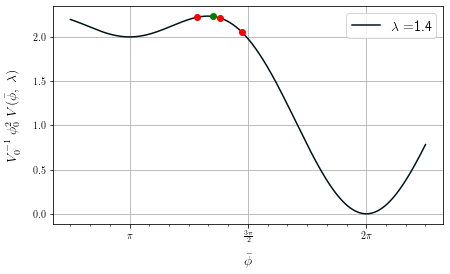

In [8]:
if True:
    philist = np.linspace(0.75*np.pi, 2.25*np.pi, 10000)
    elems = [left_Vmax.x, right_Vmax.x]

    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    ax.plot(philist, V(philist, lamb)/(4.*nu), label=r'$\lambda=$'+str(lamb))
    ax.plot(right_Vmax.x, V(right_Vmax.x, lamb)/(4.*nu), 'go')
    ax.plot(phieq + 3.*sigmafld, V(phieq + 3.*sigmafld, lamb)/(4.*nu), 'ro')
    ax.plot(phieq + 4.*sigmafld, V(phieq + 4.*sigmafld, lamb)/(4.*nu), 'ro')
    ax.plot(phieq + 5.*sigmafld, V(phieq + 5.*sigmafld, lamb)/(4.*nu), 'ro')

    ax.set_xlabel(r'$\bar{\phi}$')
    ax.set_ylabel(r'$V_0^{-1} \; \phi_0^2 \; V(\bar{\phi},\; \lambda)$')
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    plt.grid(); plt.legend()
    plt.savefig('./data/potential.pdf', rasterize=True)
    plt.show()


In [9]:
if tmp==0:
    ampList0 = np.linspace(phieq + 4.*sigmafld, phieq + 7.*sigmafld, 10)
    ampList = np.linspace(phieq + 3.*sigmafld, phieq + 4.*sigmafld, 20)
elif tmp==1:
    ampList0 = np.linspace(phieq + 3.*sigmafld, phieq + 7.*sigmafld, 10)
    ampList = np.linspace(phieq + 3.*sigmafld, phieq + 4.*sigmafld, 20)
elif tmp==2:
    ampList0 = np.linspace(phieq + 3.5*sigmafld, phieq + 7.*sigmafld, 10)
    ampList = np.linspace(phieq + 3.5*sigmafld, phieq + 6.*sigmafld, 10)
elif tmp==3:
    ampList0 = np.linspace(phieq + 3.5*sigmafld, phieq + 7.*sigmafld, 10)
    ampList = np.linspace(phieq + 3.5*sigmafld, phieq + 6.*sigmafld, 10)
xList = np.arange(120, 2*crit_rad, 20)
thresh_av = right_Vmax.x+2.*sigmafld
rad_av = 30
print('Looking at at lambda, T, phi0, m2, sigma:', lamb, temp, phi0, m2(lamb), sigmafld)

if False:
    asim = 0
    bsim = 2
    plots = True

    ranList = simList[asim : bsim]
    random.shuffle(ranList)
    for sim in [1606]:#[810]:

        print('Starting simulation, temp, lambda:', sim, temp, lamb)
        path_clean_sim = clean_sim_location(nLat, lamb, phi0, temp, sim)
        fullreal, sim, tdecay, outcome = np.load(path_clean_sim+'.npy')
        if temp != 0:
            bubble   = np.asarray([fullreal[0, -nLat:]]) # this is to speed up the boosting
        else:
            fullreal = multiply_bubble(fullreal, lightc, phieq, 0.75, normal, nLat)
            bubble   = np.asarray([fullreal[0, :]])
        simple_imshow(bubble[0], [0,len(bubble[0][0]),0,len(bubble[0])], 'Original')

        maxwin = 250
        tcen, xcen = find_nucleation_center(bubble[0], phieq, crit_thresh, crit_rad)
        nT, nN = np.shape(bubble[0])
        tl,tr = max(0, tcen-maxwin), min(nT-1, tcen+maxwin)
        xl,xr = max(0, xcen-maxwin), min(nN-1, xcen+maxwin)

        fig, ax = plt.subplots(1, 1, figsize = (15, 6))
        ext = [xl,xr,tl,tr]
        im = plt.imshow(bubble[0,tl:tr,xl:xr], interpolation='none', extent=ext, origin='lower', cmap='Spectral')
        clb = plt.colorbar(im, ax = ax)
        plt.plot(xcen,tcen,'bo'); plt.xlabel('x'); plt.ylabel('t'); plt.show()

        bool, vellist = True, []
        beta = find_COM_vel(bubble, ampList0, xList, nLat, lightc, phieq, crit_thresh, crit_rad, dx2plot, temp, plots)
        if np.isnan(beta):
            print('Simulation, temp, lambda:', sim, temp, lamb, 'dead end at step 0.')
            bool = False

        if temp == 0 and len(vellist)==0:
            beta = np.sign(beta) * 0.9#387061360606106

        while np.abs(beta) > 0.05:
            roundlist = np.asarray([round(vv, 2) for vv in vellist])
            if round(beta, 2) in roundlist:
                beta = beta/2.
                if np.abs(beta) <= 0.025: break
            elif len(vellist)!=0 and np.abs(beta) > 0.1:
                if np.sign(beta) != np.sign(vellist[-1]):
                    beta = beta/2.
                    if np.abs(beta) <= 0.025: break
            vellist.append(beta); print(vellist)

            simple_imshow(bubble[0], [0,len(bubble[0][0]),0,len(bubble[0])], 'Before')
            bubble = boost_bubble(bubble, nLat, lightc, phieq, beta, crit_thresh, crit_rad, thresh_av, rad_av, normal)
            simple_imshow(bubble[0], [0,len(bubble[0][0]),0,len(bubble[0])], 'After')

            beta = find_COM_vel(bubble, ampList, xList, nLat, lightc, phieq, crit_thresh, crit_rad, dx2plot, temp, plots)
            if np.isnan(beta):
                print('Simulation, temp, lambda:', sim, temp, lamb, ': dead end.')
                bool = False

        if bool:
            vellist.append(beta)
            totbeta = get_totvel_from_list(vellist)
            finalreal = multiply_bubble(fullreal, lightc, phieq, totbeta, normal, nLat)
            if temp==0: finalreal = finalreal[:, nLat:]
            #finalreal, _ = centre_bubble(finalreal, nLat, phieq, crit_thresh, crit_rad)
            simple_imshow(finalreal[0], [0,len(finalreal[0][0]),0,len(finalreal[0])], '2 save')

            finalreal = boost_bubble(finalreal, nLat, lightc, phieq, totbeta, crit_thresh, crit_rad, thresh_av, rad_av, normal)

            finalreal = space_save(finalreal, phieq, crit_thresh, crit_rad, win=400)
            simple_imshow(finalreal[0], [0,len(finalreal[0][0]),0,len(finalreal[0])], 'Final result')

            testbeta = find_COM_vel(finalreal, ampList, xList, nLat, lightc, phieq, crit_thresh, crit_rad, dx2plot, temp, plots)        

           # finalreal = boost_bubble(finalreal, nLat, lightc, phieq, testbeta, crit_thresh, crit_rad, thresh_av, rad_av, normal)
           # simple_imshow(finalreal[0], [0,len(finalreal[0][0]),0,len(finalreal[0])], 'Final result')

           # totbeta = get_totvel_from_list([totbeta, testbeta])
            print('Final detection: measured, total boost', testbeta, totbeta)

            np.save(bubble_at_rest(nLat, lamb, phi0, temp, sim), np.asarray([sim, finalreal, totbeta, beta]))
            print('Total vel, final vel, vel list:', totbeta, beta, vellist)
    print('All Done.')


Looking at at lambda, T, phi0, m2, sigma: 1.4 0.15 2.243994752564138 0.0076799999999999985 0.2987424590556834


In [104]:
%run 'bubble_tools.py'

In [105]:
sim = 26 #16

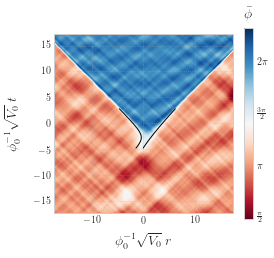

In [103]:
ampList0 = np.linspace(phieq + 4.5*sigmafld, phieq + 5.*sigmafld, 1)
xList = np.arange(120, 2*crit_rad, 50)

path_clean_sim = clean_sim_location(nLat, lamb, phi0, temp, sim)
fullreal, sim, tdecay, outcome = np.load(path_clean_sim+'.npy')
bubble = np.asarray([fullreal[0, -nLat:]]) # this is to speed up the boosting

nC, nT, nN = np.shape(bubble)
real = bubble[0]
t_cen, x_centre = find_nucleation_center(real, phieq, crit_thresh, crit_rad)
t_max_width = find_t_max_width(real, lightc, phieq, crit_thresh, crit_rad, t_cen-nLat)
if t_cen > t_max_width:
    t_cen = t_max_width

t_centre, x_centre = find_nucleation_center(real[:t_cen], phieq, crit_thresh, crit_rad)
t_stop = min(t_centre + crit_rad//2, t_max_width)
#if nLat > 1024 and temp == 0: real = gaussian_filter(real, 1., mode='nearest')

betas = np.zeros((len(ampList0), len(xList)))
for xx, x_size in enumerate(xList):
    for vv, v_size in enumerate(ampList0):
        vel_plots = True
        betas[vv, xx] = get_COM_velocity(real, phieq, crit_thresh, crit_rad, t_cen, t_stop, v_size, x_size, dx2plot, vel_plots)

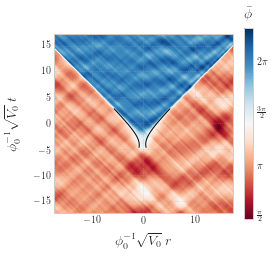

In [106]:
path_sim = bubble_at_rest(nLat, lamb, phi0, temp, sim)
sim, fullreal, totbeta, beta = np.load(path_sim+'.npy')
bubble = np.asarray([fullreal[0, -nLat:]]) # this is to speed up the boosting

nC, nT, nN = np.shape(bubble)
real = bubble[0]
t_cen, x_centre = find_nucleation_center(real, phieq, crit_thresh, crit_rad)
t_max_width = find_t_max_width(real, lightc, phieq, crit_thresh, crit_rad, t_cen-nLat)
if t_cen > t_max_width:
    t_cen = t_max_width

t_centre, x_centre = find_nucleation_center(real[:t_cen], phieq, crit_thresh, crit_rad)
t_stop = min(t_centre + crit_rad//2, t_max_width)
#if nLat > 1024 and temp == 0: real = gaussian_filter(real, 1., mode='nearest')

betas = np.zeros((len(ampList0), len(xList)))
for xx, x_size in enumerate(xList):
    for vv, v_size in enumerate(ampList0):
        vel_plots = True
        betas[vv, xx] = get_COM_velocity(real, phieq, crit_thresh, crit_rad, t_cen, t_stop, v_size, x_size, dx2plot, vel_plots)
